**La phase de préparation de données:**
* Prétraitement :






In [ ]:
#Télécharger et lire la base de données cancer_des_poumons.csv existent dans votre Classroom.
import pandas as pd
# Charger le jeu de données
data = pd.read_csv('/content/cancer_des_poumons.csv')
print(data)


    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69      NaN               2        2              1   
1        M   74      2.0               1        1              1   
2        F   59      1.0               1        1              2   
3        M   63      2.0               2        2              1   
4        F   63      NaN               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56      1.0               1        1              2   
305      M   70      2.0               1        1              1   
306      M   58      2.0               1        1              1   
307      M   67      2.0               1        2              1   
308      M   62      1.0               1        1              2   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1.0        2        1         2                  2         2   
1                2.0 

In [ ]:
#Interpréter le jeu de données : indiquer le nombre des observations dans la base ainsi que le nombre des caractéristiques.
# Obtenir le nombre d'observations et de caractéristiques
nombre_observations = data.shape[0]
nombre_caracteristiques = data.shape[1]

print(f"Nombre d'observations : {nombre_observations}")
print(f"Nombre de caractéristiques : {nombre_caracteristiques}")

Nombre d'observations : 309
Nombre de caractéristiques : 15


In [ ]:
#Vérifier s’il existe des observations qui sont manquantes ou NaN
print(data.isna().values.any())
print(data.isna().sum())
#remplacer les valeurs manquantes dans chaque colonne par la moyenne de la variable
data_num = data.select_dtypes(include='number')
data=data.fillna(data_num.mean())
#afficher la base de données après le remplacement des valeurs manquantes
print(data)

True
GENDER                   0
AGE                      0
SMOKING                  2
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          1
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64
    GENDER  AGE   SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69  1.566775               2        2              1   
1        M   74  2.000000               1        1              1   
2        F   59  1.000000               1        1              2   
3        M   63  2.000000               2        2              1   
4        F   63  1.566775               2        1              1   
..     ...  ...       ...             ...      ...            ...   
304      F   56  1.000000               1        1              2   
305      M   70  2.000000


* Transformations :






In [ ]:
#Transformer les caractéristiques dont les valeurs sont de type chaine de caractères en entier
#Remplacer directement les valeurs de la colonne 'GENDER'
data['GENDER'] = data['GENDER'].replace({'F': 1, 'M': 0})
#Afficher la BD
print(data)


     GENDER  AGE   SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69  1.566775               2        2              1   
1         0   74  2.000000               1        1              1   
2         1   59  1.000000               1        1              2   
3         0   63  2.000000               2        2              1   
4         1   63  1.566775               2        1              1   
..      ...  ...       ...             ...      ...            ...   
304       1   56  1.000000               1        1              2   
305       0   70  2.000000               1        1              1   
306       0   58  2.000000               1        1              1   
307       0   67  2.000000               1        2              1   
308       0   62  1.000000               1        1              2   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1.0        2        1         2                  2         2 

In [ ]:
# Vérifier si les données sont normalisées
# On calcul la  moyenne
means = data.mean()
# On calcul l'écart-type
stds = data.std()
# On vérifie  si la moyenne de chaque colonne n'est pas proche de 0 ou si l'écart type de chaque colonne n'est pas proche de 1
if (means.abs() > 1e-10).any() or (stds.abs() - 1).any() > 1e-10:
    # Si les données ne sont pas normalisées il faut  les centrer et les réduire
    data = (data - means) / stds

# Afficher la base de données après la normalisation
print(data)



       GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0   -0.951037  0.770600  0.000000        0.867892  1.001617      -1.001617   
1   -0.951037  1.379591  0.875704       -1.148488 -0.995155      -1.001617   
2    1.048081 -0.447382 -1.145658       -1.148488 -0.995155       0.995155   
3   -0.951037  0.039811  0.875704        0.867892  1.001617      -1.001617   
4    1.048081  0.039811  0.000000        0.867892 -0.995155      -1.001617   
..        ...       ...       ...             ...       ...            ...   
304  1.048081 -0.812776 -1.145658       -1.148488 -0.995155       0.995155   
305 -0.951037  0.892399  0.875704       -1.148488 -0.995155      -1.001617   
306 -0.951037 -0.569180  0.875704       -1.148488 -0.995155      -1.001617   
307 -0.951037  0.527004  0.875704       -1.148488  1.001617      -1.001617   
308 -0.951037 -0.081987 -1.145658       -1.148488 -0.995155       0.995155   

     CHRONIC DISEASE   FATIGUE   ALLERGY  WHEEZING  ALCOHOL CON

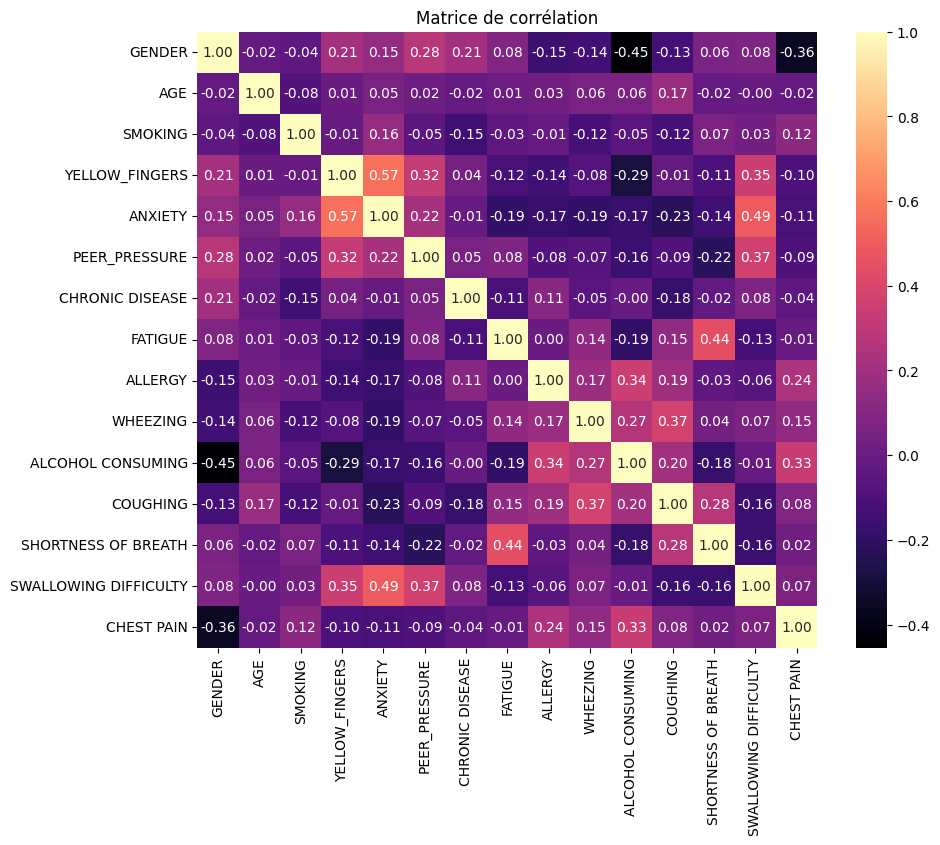

In [ ]:
# Calculer la matrice de corrélation
matrice_corrélation = data.corr()
# Afficher la matrice de corrélation sous forme de heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corrélation, annot=True,  cmap='magma', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


 Les couples de variables les plus corrélées sont :
 YELLOW_FINGERS         ANXIETY                  0.565829
ANXIETY                YELLOW_FINGERS           0.565829
SWALLOWING DIFFICULTY  ANXIETY                  0.489403
ANXIETY                SWALLOWING DIFFICULTY    0.489403
ALCOHOL CONSUMING      GENDER                   0.454268
                                                  ...   
ALLERGY                FATIGUE                  0.003056
ALCOHOL CONSUMING      CHRONIC DISEASE          0.001525
CHRONIC DISEASE        ALCOHOL CONSUMING        0.001525
SWALLOWING DIFFICULTY  AGE                      0.001270
AGE                    SWALLOWING DIFFICULTY    0.001270
Length: 210, dtype: float64


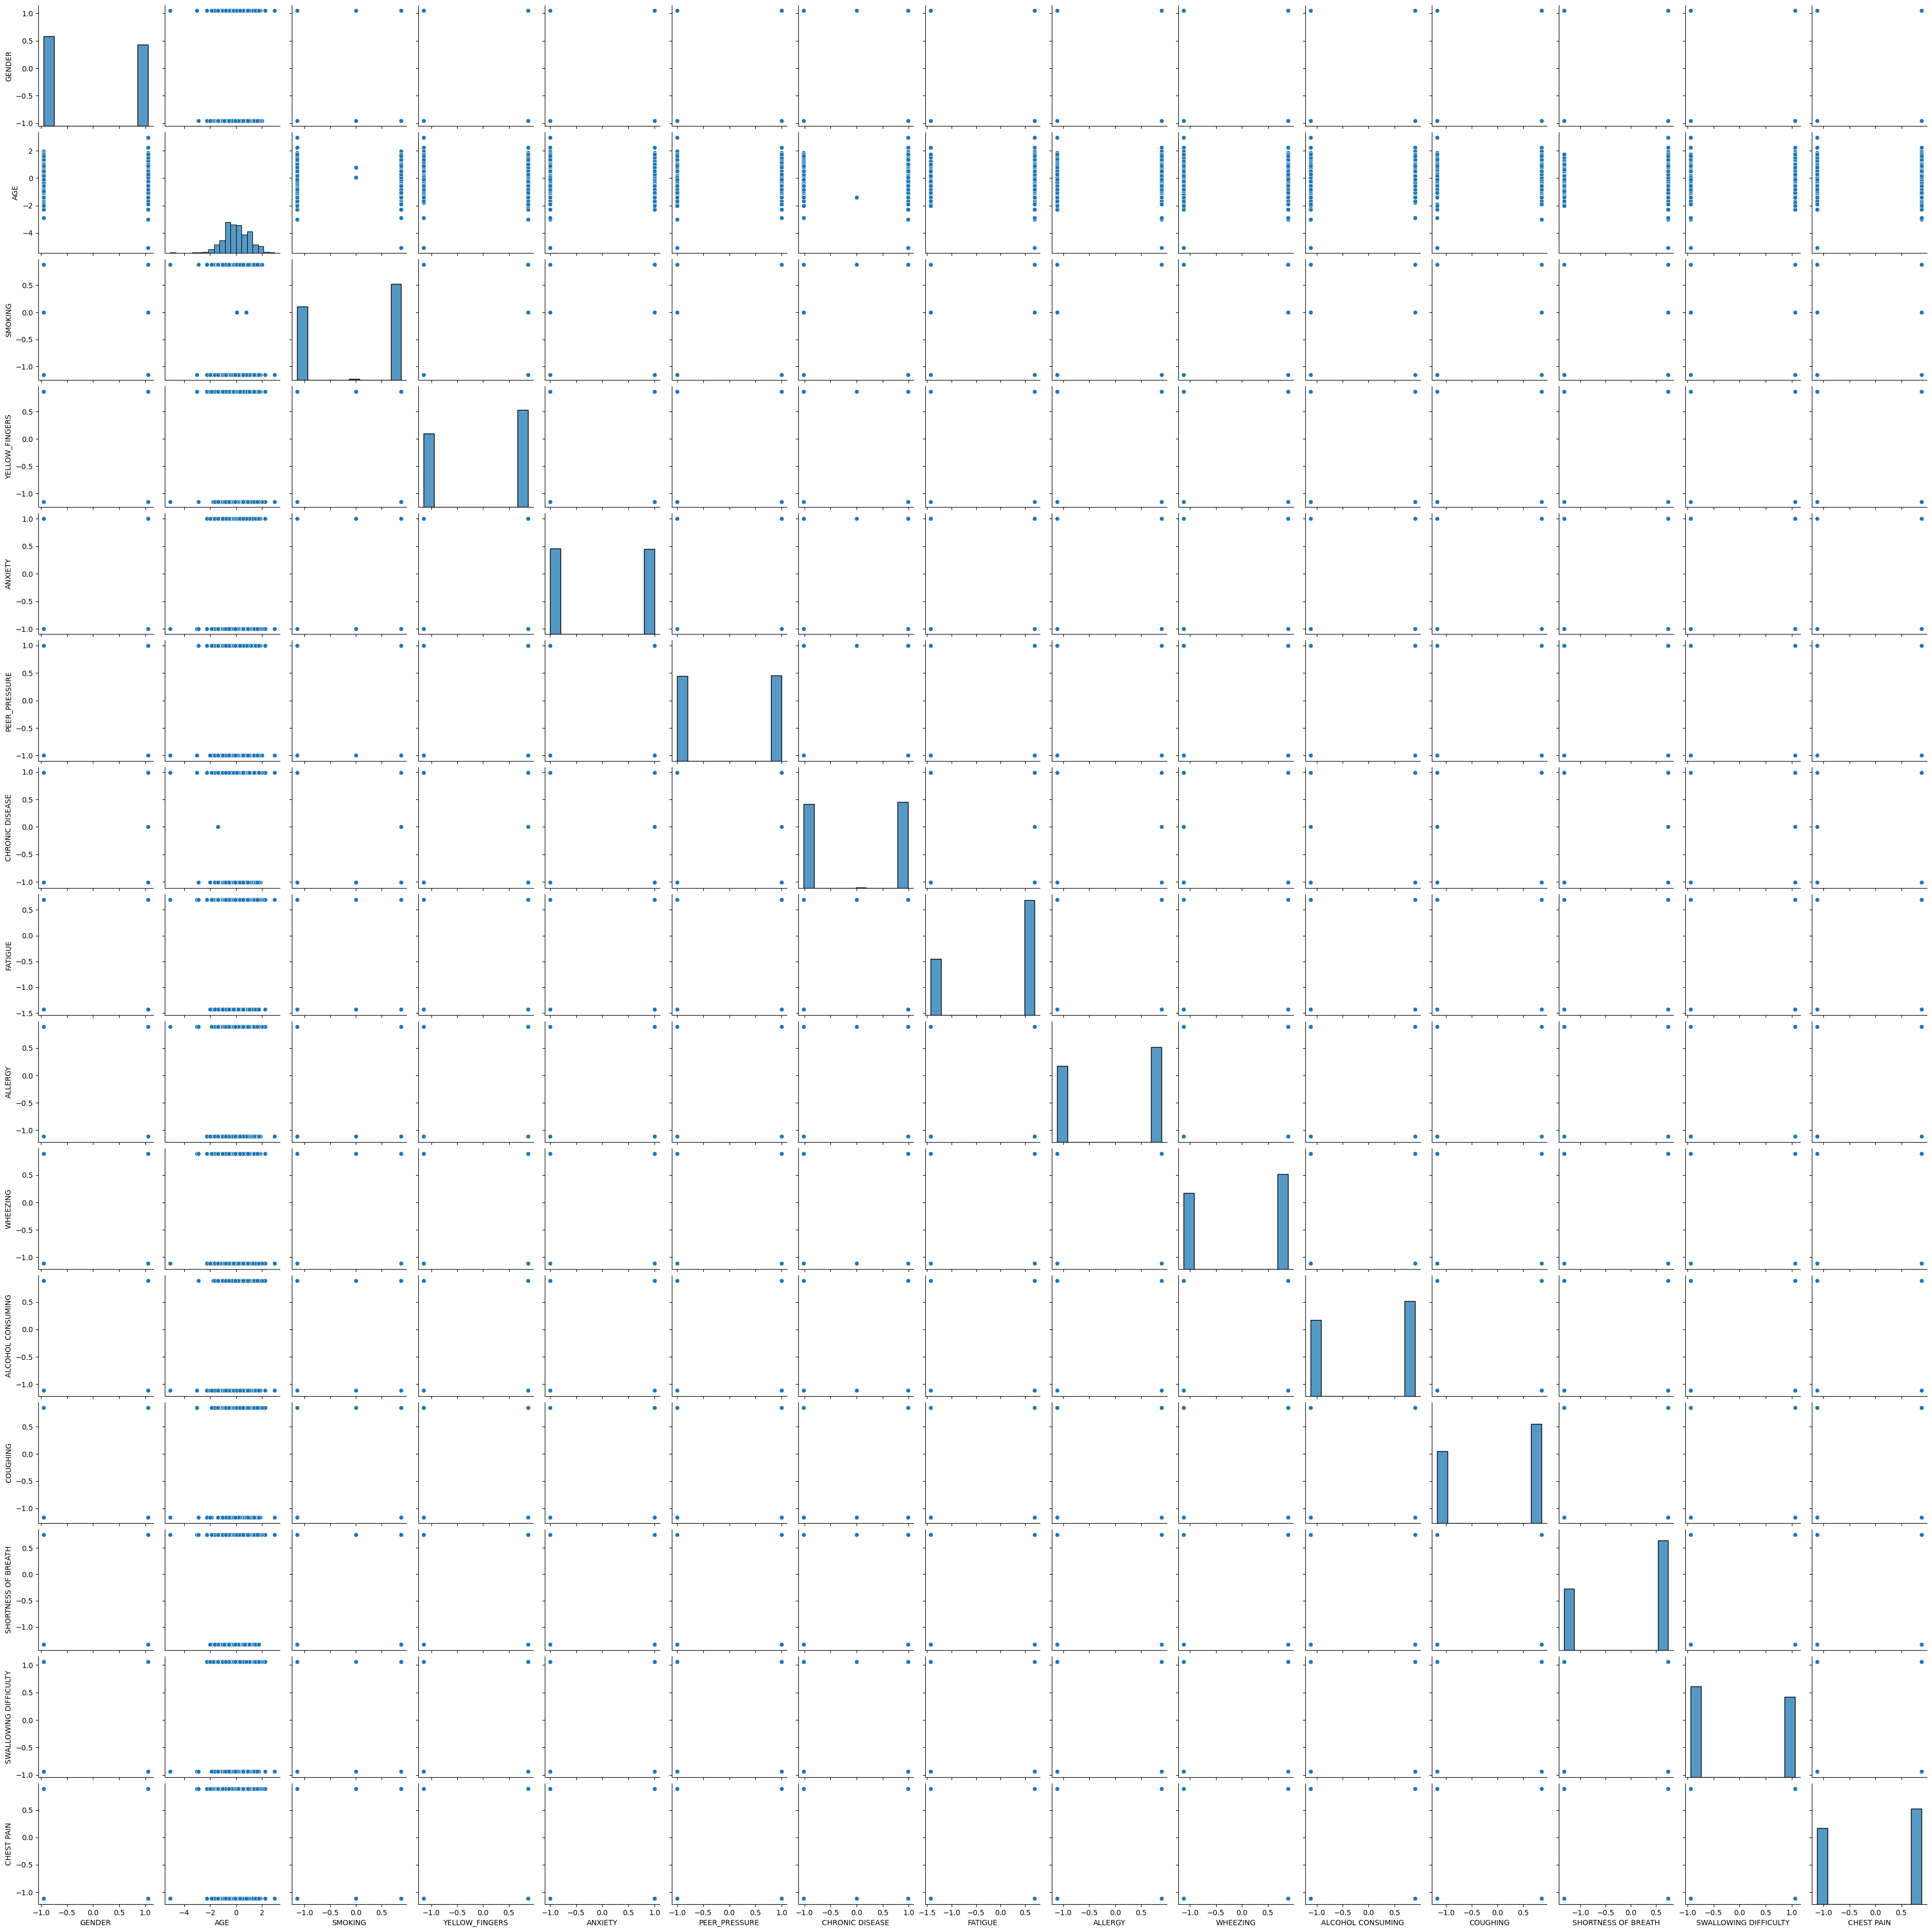

In [ ]:
# Les couples de variables les plus corrélées
# On calcul la corrélation absolue de chaque paire de variables, les déplie en une série, puis les trie par ordre décroissant en fonction de leur corrélation
corr_max = matrice_corrélation.abs().unstack().sort_values(ascending=False)
# Supprimer les corrélations entre une variable et elle-même
corr_max = corr_max[corr_max != 1]
print(" Les couples de variables les plus corrélées sont :\n",corr_max )
# Création d'un pairplot à partir des données,  qui permet de visualiser graphiquement les relations entre paires de variables
sns.pairplot(data)
# Affichage du pairplot
plt.show()


**La phase d'extraction des caractéristiques:**


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Appliquer sur la base une ACP normée
acp = PCA(n_components=None)
acp_result = acp.fit_transform(data)
print("Les résultats de l'ACP normée:")
print(acp_result)
print()

# Calculer les valeurs propres des composantes principales
Valeurs_propres = acp.explained_variance_
print("Valeurs propres des composantes principales:")
print(Valeurs_propres)


Les résultats de l'ACP normée:
[[-0.55403503  0.67114667 -1.74606069 ... -0.64888015  0.30384719
   0.43002067]
 [-0.69432191 -0.32009657  1.0403098  ...  1.83335999  0.54400953
   0.54510803]
 [-0.7902911  -2.08445474 -0.88094189 ... -0.23950529 -0.27972608
  -1.01873406]
 ...
 [-2.61246887  1.57967982  1.09914008 ...  0.25930205  0.29054789
  -0.30571597]
 [-1.86401255  0.03727401  0.39850373 ... -0.78287163  0.51852024
  -0.89015649]
 [-0.70645234  0.97897417 -0.16977975 ...  0.6794383  -0.29064097
   0.48523977]]

Valeurs propres des composantes principales:
[2.8617324  1.94070344 1.53918574 1.35007001 1.12495615 0.96831418
 0.8877083  0.81503558 0.73567426 0.63240412 0.57434379 0.52298284
 0.43068939 0.33056652 0.28563328]


In [ ]:
# Interprétation des valeurs propres des composantes principales
# Calculer le pourcentage de variance expliquée par chaque composante principale
pourcentage_variance_expliquee = acp.explained_variance_ratio_
print("Les ratios de variance explique de chaque composante principale:")
print(pourcentage_variance_expliquee)

Les ratios de variance explique de chaque composante principale:
[0.19078216 0.12938023 0.10261238 0.09000467 0.07499708 0.06455428
 0.05918055 0.05433571 0.04904495 0.04216027 0.03828959 0.03486552
 0.02871263 0.02203777 0.01904222]


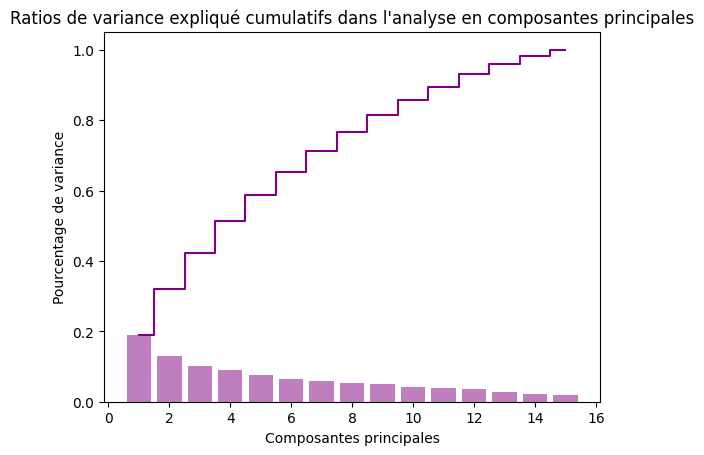

In [ ]:
# Le traçage
# Ce graphique est pour visualiser les ratios de variance expliquée par chaque composante principale ainsi que le pourcentage cumulé de variance expliqué
# création d'un graphique en barres où chaque barre représente le pourcentage de variance expliquée par une composante principale
plt.bar(range(1, len(pourcentage_variance_expliquee) + 1), pourcentage_variance_expliquee, alpha=0.5, align='center',color='purple')
# création d'un graphique en escalier qui représente le pourcentage cumulé de variance expliquée par les composantes principales
plt.step(range(1, len(pourcentage_variance_expliquee) + 1), np.cumsum(pourcentage_variance_expliquee), where='mid',color='purple')
plt.title("Ratios de variance expliqué cumulatifs dans l'analyse en composantes principales")
plt.ylabel('Pourcentage de variance')
plt.xlabel('Composantes principales')
plt.show()


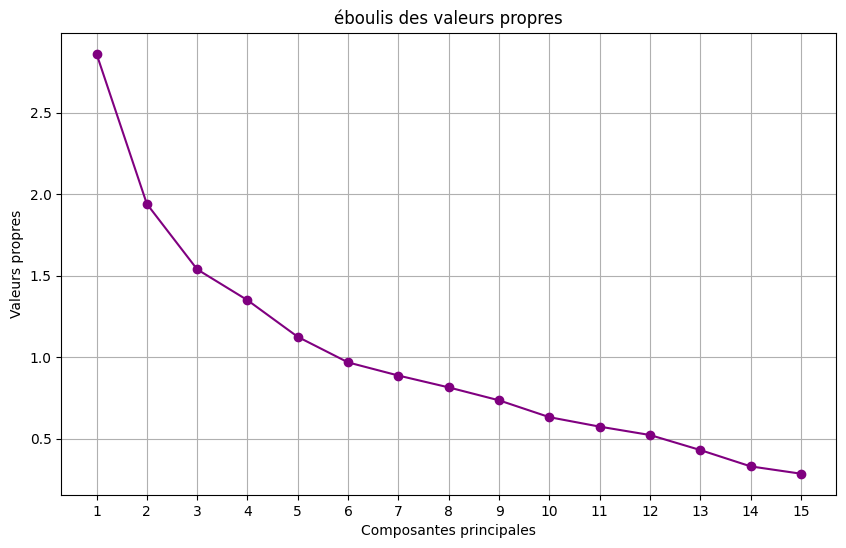

In [ ]:
#L'éboulis des valeurs propres
indices = np.arange(1, len(Valeurs_propres) + 1)

plt.figure(figsize=(10, 6))
plt.plot(indices, Valeurs_propres, marker='o', color='purple')
plt.title('éboulis des valeurs propres')
plt.xlabel('Composantes principales')
plt.ylabel('Valeurs propres')
plt.xticks(indices)
plt.grid(True)
plt.show()

Pourcentage d'inertie expliqué par chaque composante principale:
 1 : 19.08%
 2 : 12.94%
 3 : 10.26%
 4 : 9.00%
 5 : 7.50%
 6 : 6.46%
 7 : 5.92%
 8 : 5.43%
 9 : 4.90%
 10 : 4.22%
 11 : 3.83%
 12 : 3.49%
 13 : 2.87%
 14 : 2.20%
 15 : 1.90%


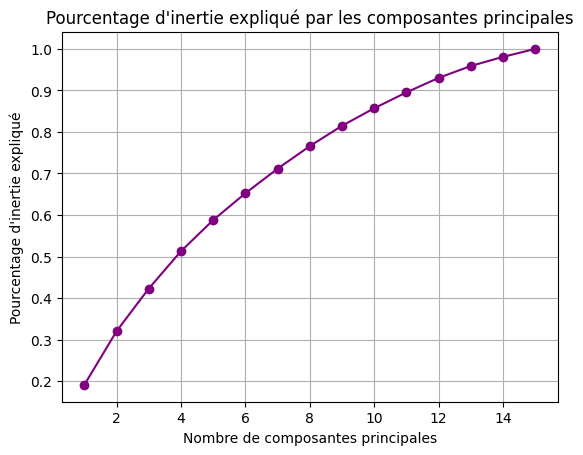

In [ ]:
# Calcul des valeurs propres
valeurs_propres = np.linalg.eigvals(matrice_corrélation)
# Calcul du pourcentage d'inertie expliqué par chaque composante principale
pourcentage_inertie = (valeurs_propres / np.sum(valeurs_propres))
variance_cumulee = np.cumsum(pourcentage_variance_expliquee)
# Obtenir les indices triés des pourcentages d'inertie
indices_tries = np.argsort(pourcentage_inertie)[::-1]
# Affichage des pourcentages d'inertie triés en ordre décroissant
print("Pourcentage d'inertie expliqué par chaque composante principale:")
for i, indice in enumerate(indices_tries):
    print(f" {i+1} : {pourcentage_inertie[indice]:.2%}")

# Tracer le graphique du pourcentage d'inertie expliqué
plt.plot(range(1, len(pourcentage_variance_expliquee) + 1), variance_cumulee, marker='o', linestyle='-', color='purple')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage d\'inertie expliqué')
plt.title('Pourcentage d\'inertie expliqué par les composantes principales')
plt.grid(True)
plt.show()


In [ ]:
# Identifier le nombre de composantes principales à retenir en fonction de la méthode du coude
diff = np.diff(pourcentage_variance_expliquee)
idx = np.argmax(diff) + 1
n_components = idx + 1
print("Nombre de composantes principales à retenir en utilisant la méthode du coude :", n_components)

Nombre de composantes principales à retenir en utilisant la méthode du coude : 15


In [ ]:
# Afficher la saturation des variables
print("La saturation des variables est :")
print(acp.components_)

La saturation des variables est :
[[ 0.32151245 -0.03532384  0.04424042  0.37965648  0.40325144  0.30518301
   0.09380579 -0.10372346 -0.25177484 -0.24614989 -0.33363416 -0.28006549
  -0.14029197  0.29016447 -0.23743043]
 [-0.30805453  0.03806395  0.04099905  0.11768616  0.22588897  0.08036353
   0.04309354 -0.42989577  0.21678909  0.09613101  0.42437368 -0.08020527
  -0.44545947  0.33275371  0.30339293]
 [-0.07897828 -0.26073716  0.19505395 -0.31396381 -0.13774556 -0.30075393
   0.08620677 -0.30436652 -0.11140767 -0.45230185 -0.01455001 -0.48432175
  -0.19267    -0.2959574  -0.05640477]
 [ 0.2626421   0.11120374 -0.58260409 -0.10677992 -0.25954302  0.12960958
   0.52575377 -0.13398746  0.16834407  0.08316423  0.08169567 -0.02332703
  -0.25564332 -0.09748843 -0.26825478]
 [ 0.15412459 -0.47467174  0.20489137 -0.04711331 -0.05679142  0.14832342
   0.4571345   0.27000636  0.35628499  0.03422739 -0.0090313  -0.2036043
   0.24768092  0.21221354  0.35157434]
 [-0.09194589 -0.56333896 -0.231

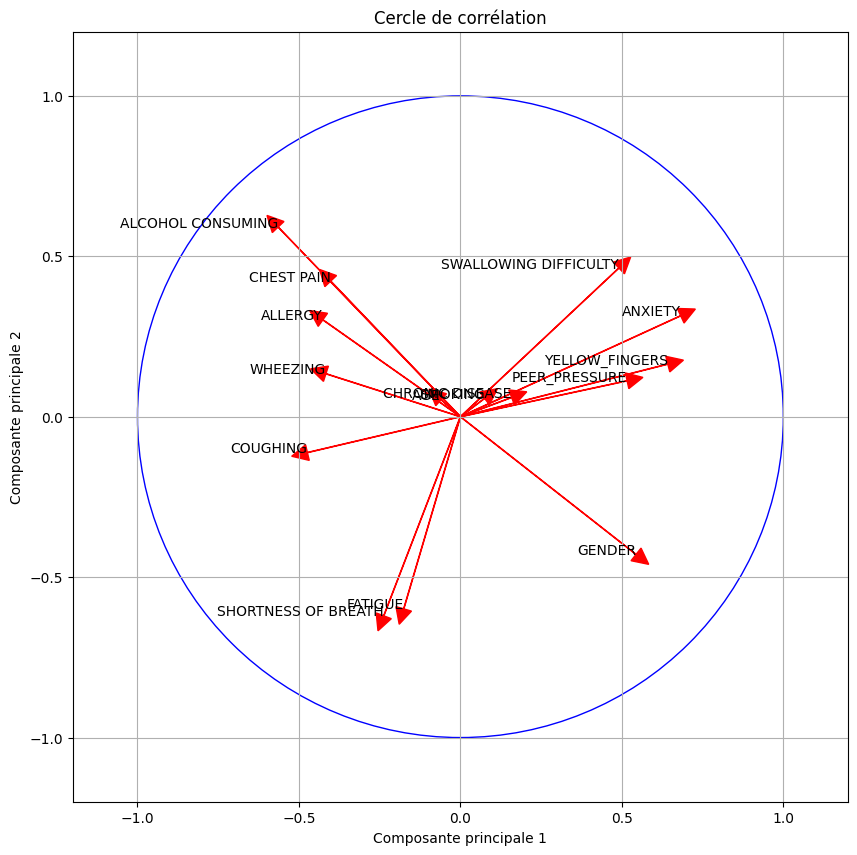

In [ ]:
# Le cercle de corrélation
import matplotlib.pyplot as plt
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0,0),radius=1,fc='none',color='blue')
ax.add_artist(circle)
for i, (x, y) in enumerate(loadings[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(x, y, data.columns[i], ha='right')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle de corrélation')
plt.grid(True)
plt.show()

**La phase de Data Mining :**

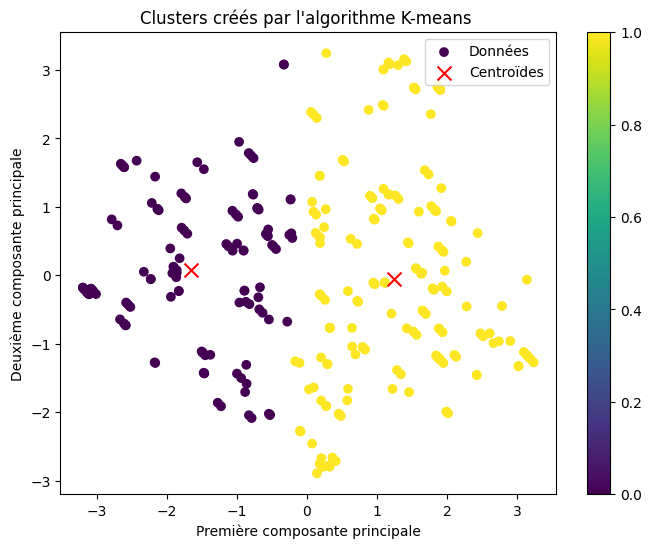

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Réduire les données en deux dimensions avec l'ACP
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Appliquer l'algorithme K-means aux données réduites
kmeans = KMeans(n_clusters=2, n_init=10)  # Utilisation de n_init=10 pour spécifier le nombre d'initialisations
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Créer un graphique en deux dimensions pour visualiser les clusters et les centroïdes
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', label='Données')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroïdes')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Clusters créés par l\'algorithme K-means ')
plt.colorbar()
plt.legend()
plt.show()


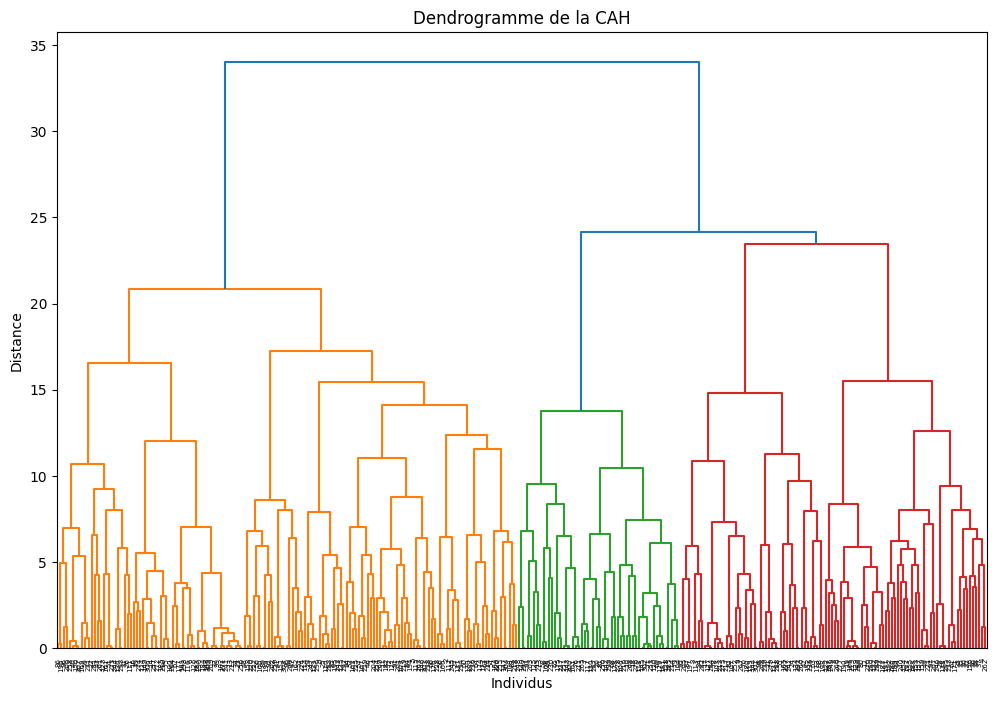

In [ ]:
#Appliquer l'algorithme Classification Ascendante Hiérarchique (CAH)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Utiliser la méthode de linkage 'ward' pour regrouper les données
Z = linkage(data, method='ward')
# Afficher le dendrogramme pour visualiser les regroupements
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogramme de la CAH')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()



